In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/s(s+1)
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#c) Dizajnirati integralni kompenzator koji obezbedjuje brzinsku konstantu > 10, i faznu marginu >45 stepeni
#d) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#e) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom
#f) Diskretizovati kontroler i sistem

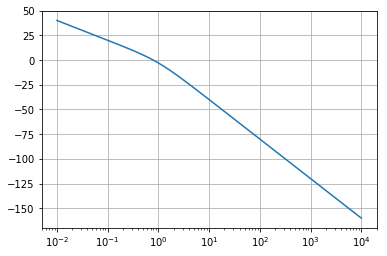

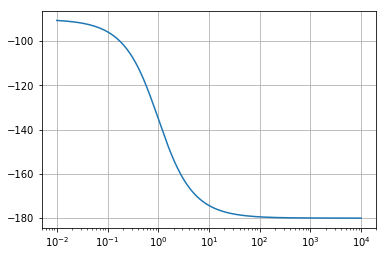

In [3]:
W=signal.lti([], [0, -1], 1)
# a)
w_log=np.logspace(-2,4,num=10000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [4]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
# presecna ucestanost faze je beskonacna 
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))
# amplitudska margina je beskonacna
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 0.79
Presecna ucestanost faze: 10000.0
Amplitudska margina: 100000000.5
Fazna margina: 51.86


In [5]:
#c) # Trazimo kontroler C(s)=K*alpha(s/z+1)/(s/p+1), p=z/alpha 
# Trazimo pojacanje K za koje je fazna margina za oko 10 stepeni veca od trazene:
mag_PM=mag[phase[:]>=-180+55][-1]
K=1/(10**(mag_PM/20))
print("Pojacanje za koje je PM 55 je",round(K,1))

Pojacanje za koje je PM 55 je 0.9


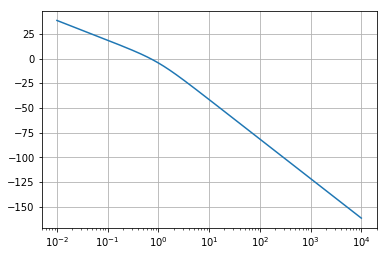

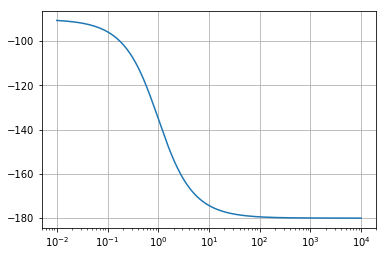

In [6]:
# Bodeov dijagram za KW(s):
W1=signal.lti([], [0, -1], K)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [7]:
# presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Presecna ucestanost pojacanja: 0.7
Fazna margina: 55.0


In [8]:
# Da bismo dobili trazenu brzinsku konstantu 10, alpha treba da bude 10/K
alpha=10/K
# probamo nulu z npr. 5 puta manju od w1, znaci pol je p=z/alpha
z=w1/8
p=z/alpha
alpha,z,p

(11.70021667101463, 0.087517425081428013, 0.0074799832808428324)

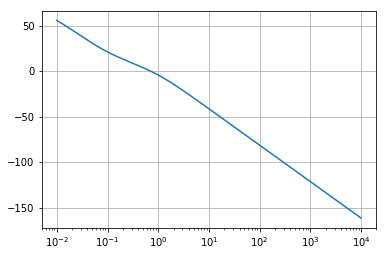

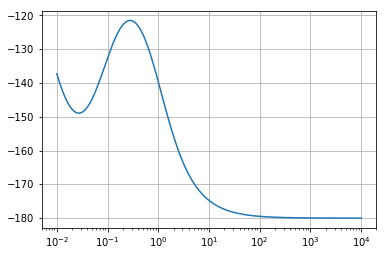

Presecna ucestanost pojacanja: 0.7
Fazna margina: 48.38


In [9]:
# Proveravamo sistem
W2=signal.lti([-z], [0, -1, -p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

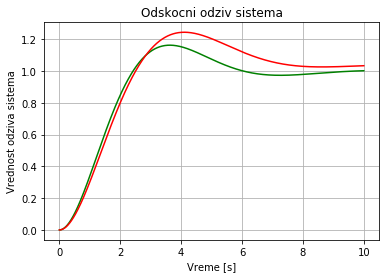

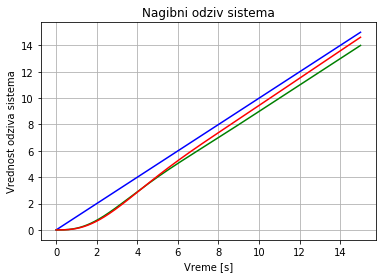

In [10]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=K(s+z)/s(s+1)(s+p)

brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve([1,0],[1,1]),[1,p])
imenilac=imenilac1+[0, 0, K, K*z]
G2=signal.lti(brojilac,imenilac)

G=signal.lti([1],[1, 1, 1])


t=np.linspace(0,10,1000)

tt,y1=G.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Odskocni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni odziv sistema")
plt.ylabel("Vrednost odziva sistema")
plt.xlabel("Vreme [s]")
plt.grid()
plt.show()

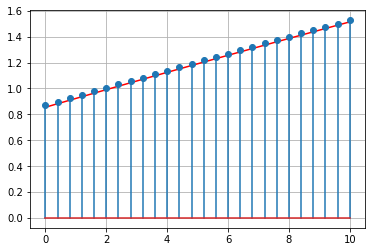

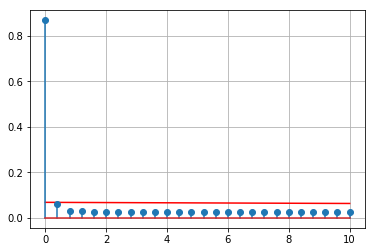

In [22]:
#f) Bilinearna diskretizacija(Tustinov metod)
# Kontroler
GG = ([-z],[-p],[K])
T=0.4

zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='bilinear')
Gd = signal.dlti(zeros, poles, gain,dt=T)
G  = signal.lti(GG[0],GG[1],GG[2])

t_max=10
ttd=np.linspace(0,t_max,int(t_max/T))

ttc=np.linspace(0,t_max,10000)
td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

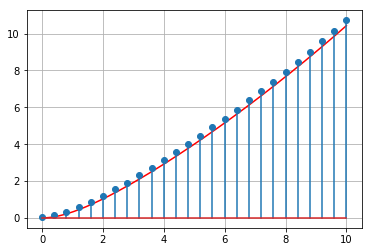

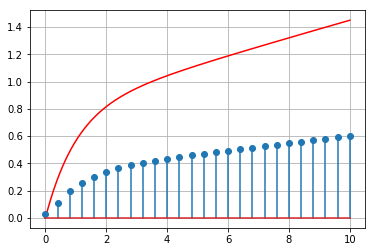

In [28]:
# Sistem
GG = ([-z],[0,-1,-p],[K])
T=0.4

zeros, poles, gain, dt=signal.cont2discrete(GG, T, method='bilinear')
Gd = signal.dlti(zeros, poles, gain,dt=T)
G  = signal.lti(GG[0],GG[1],GG[2])

t_max=10
ttd=np.linspace(0,t_max,int(t_max/T))

ttc=np.linspace(0,t_max,10000)
td,yd=Gd.step(t=ttd)
tc,yc=G.step(T=ttc)

plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()

td,yd=Gd.impulse(t=ttd)
tc,yc=G.impulse(T=ttc)
plt.plot(tc,yc,'r')
plt.stem(td,yd[0])
plt.grid()
plt.show()